In [ ]:
# Set Kaggle credentials to download files directly from their website
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username" : "megan25", "key": "3f6387270a83eb1ddb984a240d0cc934"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Download the data via kaggle API
!kaggle competitions download -c datathonSVCC21

  0% 0.00/4.12k [00:00<?, ?B/s]
100% 4.12k/4.12k [00:00<00:00, 3.64MB/s]
  0% 0.00/165k [00:00<?, ?B/s]
100% 165k/165k [00:00<00:00, 51.4MB/s]
 65% 5.00M/7.68M [00:00<00:00, 48.0MB/s]
100% 7.68M/7.68M [00:00<00:00, 49.0MB/s]
  0% 0.00/1.91M [00:00<?, ?B/s]
100% 1.91M/1.91M [00:00<00:00, 56.3MB/s]


In [ ]:
# Unzip the test and training files
!unzip test.csv.zip
!unzip train.csv.zip

Archive:  test.csv.zip
  inflating: test.csv                
Archive:  train.csv.zip
  inflating: train.csv               


In [ ]:
# Read in training data to pandas dataframe
import pandas as pd

train_df = pd.read_csv('train.csv')

# Show the first 5 rows
train_df.head()

,packet_id,seq_no,ip_add_src,ip_add_dest,src_inpk_at,dest_inpk_at,src_dest_ttl,starttime,lasttime,lstm_cxn_sport,lstm_cxn_dport,total_rec_time,src_ad_val,dest_ad_val,cxn_service_src,cxn_service_dest,lstm_cxn_src,lstm_cxn_dest,src_ttl,dest_ttl,src_bsn,dest_bsn,http_depth,src_pkt_count,dest_pkt_count,trans_src_bytes,dest_src_bytes,trans_protocol,src_bits,dest_bits,dep_protocol,src_dropped,dest_dropped,src_pkt_size,dest_pkt_size,src_jitter,dest_jitter,http_data_trans,src_dst_ip,cxn_rtt,pkack_cxn_rtt,pksyn_cxn_rtt,trans_type,ftp_pswd_flow,lstm_cxn_count,req_method,speed,ftp_access,rnd,port_dest,port_src,is_nw_intruded
0,1,81722,60.2.170.234,230.158.83.77,0.009000,0.000000,2,10:43:40,10:43:49,6,6,0.000009,0,0,22,22,6,6,254,0,0,0,0,2,0,114,0,udp,5.066666e+07,0.000000,INT,0,0,57,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,dns,0,22,0,111111.107200,0,13905,64382,54834,1
1,2,83673,79.179.114.175,100.63.1.11,85.161507,18.947174,1,17:25:08,17:25:25,1,1,4.002591,255,255,1,1,1,1,62,252,1224718414,3666839597,0,48,208,2302,253561,tcp,4.507081e+03,504357.281300,FIN,6,102,48,1219,6004.057264,2968.238180,0,0,0.116756,0.056520,0.060236,-,0,1,0,63.708731,0,2366,56998,54907,1
2,3,60486,78.219.187.155,103.152.152.4,0.005000,0.000000,2,06:25:47,06:25:47,1,1,0.000005,0,0,3,1,1,1,254,0,0,0,0,2,0,494,0,udp,3.952000e+08,0.000000,INT,0,0,247,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,-,0,1,0,200000.005100,0,2682,57405,53966,1
3,4,16701,213.77.245.114,121.246.173.153,90.890543,80.888273,1,19:12:45,19:12:49,1,1,0.999796,255,255,2,2,3,1,62,252,1607997394,3339783268,1,12,12,1262,3234,tcp,9.257889e+03,23724.839840,FIN,3,3,105,270,5156.094532,144.096828,761,0,0.261904,0.153774,0.108130,http,0,1,1,23.004694,0,13608,53962,64901,1
4,5,80069,62.148.203.79,242.88.4.212,92.197800,0.001000,3,14:04:20,14:04:23,1,2,0.460989,255,255,7,4,3,2,62,252,1024827879,3673219255,0,6,2,1012,86,tcp,1.464677e+04,746.221741,CON,2,1,169,43,5109.490527,0.000000,0,0,0.340783,0.174539,0.166244,-,0,4,0,15.184744,0,12481,49609,62846,0


In [ ]:
# Lets get a little more information
print(train_df.info())
print(train_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 52 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   packet_id         80000 non-null  int64  
 1   seq_no            80000 non-null  int64  
 2   ip_add_src        80000 non-null  object 
 3   ip_add_dest       80000 non-null  object 
 4   src_inpk_at       80000 non-null  float64
 5   dest_inpk_at      80000 non-null  float64
 6   src_dest_ttl      80000 non-null  int64  
 7   starttime         80000 non-null  object 
 8   lasttime          80000 non-null  object 
 9   lstm_cxn_sport    80000 non-null  int64  
 10  lstm_cxn_dport    80000 non-null  int64  
 11  total_rec_time    80000 non-null  float64
 12  src_ad_val        80000 non-null  int64  
 13  dest_ad_val       80000 non-null  int64  
 14  cxn_service_src   80000 non-null  int64  
 15  cxn_service_dest  80000 non-null  int64  
 16  lstm_cxn_src      80000 non-null  int64 

In [ ]:
# See how many unique values
train_df.nunique()

packet_id           80000
seq_no              80000
ip_add_src          79998
ip_add_dest         79999
src_inpk_at         44825
dest_inpk_at        43246
src_dest_ttl            7
starttime           52262
lasttime            57531
lstm_cxn_sport         35
lstm_cxn_dport         52
total_rec_time      44525
src_ad_val              9
dest_ad_val            10
cxn_service_src        57
cxn_service_dest       57
lstm_cxn_src           52
lstm_cxn_dest          52
src_ttl                10
dest_ttl                9
src_bsn             43812
dest_bsn            43686
http_depth             10
src_pkt_count         427
dest_pkt_count        399
trans_src_bytes      5140
dest_src_bytes       4591
trans_protocol          2
src_bits            48054
dest_bits           45677
dep_protocol            7
src_dropped           310
dest_dropped          312
src_pkt_size         1308
dest_pkt_size        1259
src_jitter          44960
dest_jitter         44173
http_data_trans      1538
src_dst_ip  

In [ ]:
# Focus in on one column - and see the value types
#train_df['trans_protocol'].unique()
#train_df['is_nw_intruded'].unique()
#train_df = train_df.drop(['lasttime'],axis=1)
#train_df['lasttime'].unique()


train_df['trans_type'].unique()
#train_df['dep_protocol'].unique()
#train_df['trans_protocol'].unique()

array(['dns', '-', 'http', 'ftp-data', 'smtp', 'pop3', 'ftp', 'ssh',
       'dhcp', 'snmp', 'ssl', 'radius', 'irc'], dtype=object)

In [ ]:
trans = {"udp": 0, "tcp": 1}
data = [train_df]
for dataset in data:
    dataset['trans_protocol'] = dataset['trans_protocol'].map(trans)

In [ ]:
dep = {"INT": 6, "FIN": 5, "CON":4, "REQ":3,"RST":2,"CLO":1,"ACC":0}
data = [train_df]
for dataset in data:
    dataset['dep_protocol'] = dataset['dep_protocol'].map(dep)

In [ ]:
transType = {"dns": 0, "-": 1, "http":2, "ftp-data":3,"smtp":4, "pop3": 5, "ftp":6,"ssh":7, "dhcp":8,"snmp":9,"ssl":10,"radius":11,"irc":12}
data = [train_df]
for dataset in data:
    dataset['trans_type'] = dataset['trans_type'].map(transType)

In [ ]:
train_df['trans_protocol'].unique()

array([0, 1])

Visualize the Data

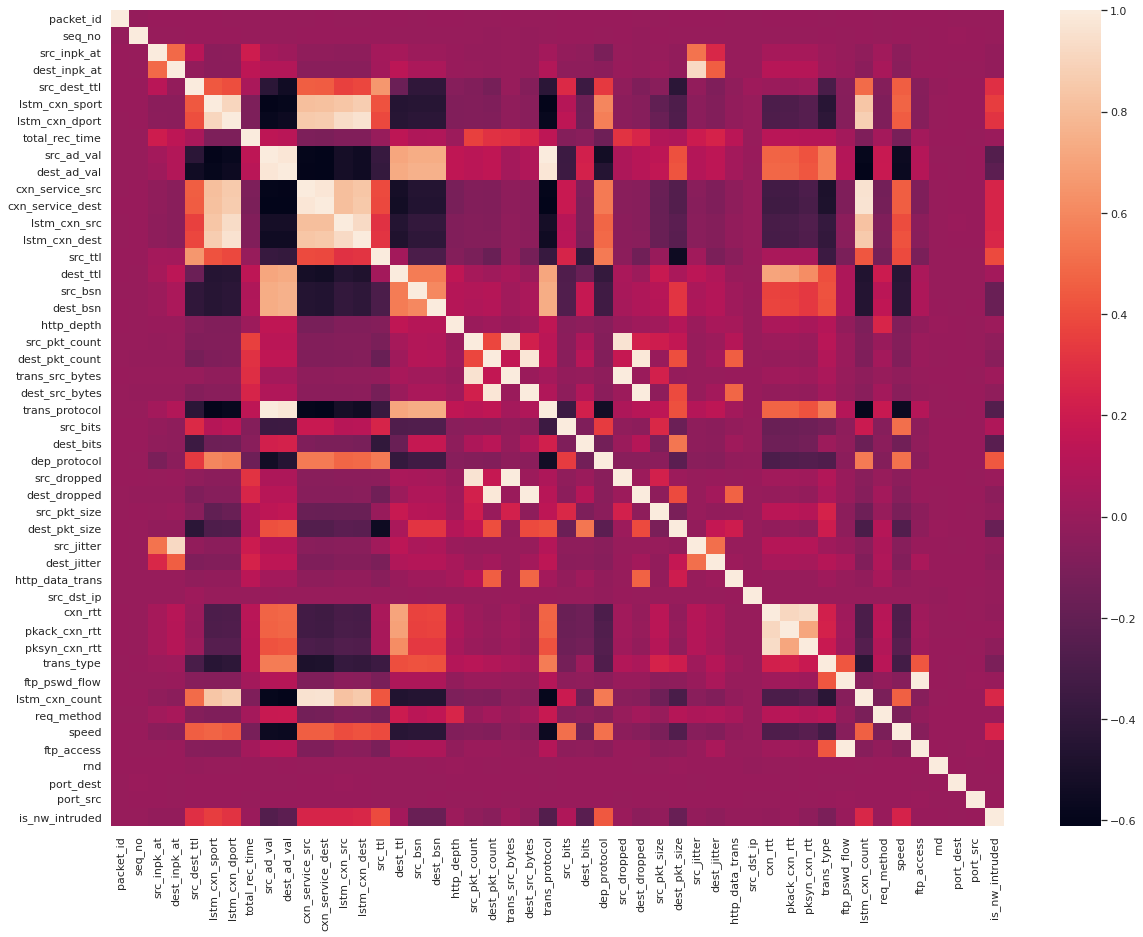

In [ ]:
# Check for correlations between columns
import seaborn as sns

# Set size of seaborn plot
sns.set(rc = {'figure.figsize': (20, 15)})

# Calculate column correlations
correlation = train_df.corr()

#Plot the heatmap
sns.heatmap(correlation)

Make First Prediction

In [ ]:
# Import model libraries
from sklearn import svm
from sklearn.model_selection import train_test_split

In [ ]:
import numpy as np
mycolumns = ['src_ttl', 'trans_protocol']
train_df[mycolumns]
print(train_df[mycolumns])
y_data = train_df[["is_nw_intruded"]]
print (y_data.shape)
train_x, test_x, train_y, test_y = train_test_split(train_df[mycolumns], y_data, test_size=0.2, random_state=42)

       src_ttl  trans_protocol
0          254               0
1           62               1
2          254               0
3           62               1
4           62               1
...        ...             ...
79995      254               1
79996       31               0
79997       31               1
79998       31               1
79999      254               1

[80000 rows x 2 columns]
(80000, 1)


In [ ]:
#Attempt to fit the model
#Create and train model
SVM_Classifier=svm.SVC(max_iter=500)
SVM_Classifier.fit(train_x,train_y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=500, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# See how we did
from sklearn import metrics
y_pred=SVM_Classifier.predict(test_x)

fpr, tpr, thresholds = metrics.roc_curve(test_y, y_pred, pos_label = 1)

print("Accuracy: ", metrics.accuracy_score(test_y, y_pred))
print("AUC: ", metrics.auc(fpr, tpr))

Accuracy:  0.7829375
AUC:  0.72341359863045


Making Predictions for the Training Set

In [ ]:
# Import the test set that was downloaded earlier
test_df = pd.read_csv('test.csv')

# Drop those same columns
test_df = test_df.drop(["ip_add_src", "ip_add_dest", "starttime", "lasttime"], axis=1)

In [ ]:
transTest = {"udp": 0, "tcp": 1}
data = [test_df]
for dataset in data:
    dataset['trans_protocol'] = dataset['trans_protocol'].map(transTest)

In [ ]:
depTest = {"INT": 0, "FIN": 1, "CON":2, "REQ":3,"RST":4,"CLO":5,"ACC":6}
data = [test_df]
for dataset in data:
    dataset['dep_protocol'] = dataset['dep_protocol'].map(depTest)

In [ ]:
transTypeTest = {"dns": 0, "-": 1, "http":2, "ftp-data":3,"smtp":4, "pop3": 5, "ftp":6,"ssh":7, "dhcp":8,"snmp":9,"ssl":10,"radius":11,"irc":12}
data = [test_df]
for dataset in data:
    dataset['trans_type'] = dataset['trans_type'].map(transTypeTest)

In [ ]:
myTestColumns = ['src_ttl','trans_protocol']
test_df[myTestColumns]

,src_ttl,trans_protocol
0,254,1
1,62,1
2,254,1
3,254,0
4,62,1
...,...,...
19995,62,1
19996,254,1
19997,254,0
19998,254,1


In [ ]:
# Make predicitions with model
predictions = SVM_Classifier.predict(test_df[myTestColumns])

In [ ]:
# Save those predictions in proper format
submission = pd.DataFrame(np.arange(1, len(predictions)+1))
submission.index = np.arange(1, len(submission) +1)
submission.index.rename('packet_id', inplace = True)
submission.rename(columns={0: 'is_nw_intruded'}, inplace=True)
submission['is_nw_intruded'] = predictions
submission

,is_nw_intruded
packet_id,
1,1
2,1
3,1
4,1
5,1
...,...
19996,1
19997,1
19998,1


In [ ]:
# Save to csv to Kaggle
submission.to_csv("SVM_Kaggle3.csv")